In [ ]:
#한글 폰트 사용설치
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/전국 범죄건수.csv',encoding='cp949')
df2=pd.read_csv('/content/drive/MyDrive/R&E김지환.csv',encoding='cp949')
df3=pd.read_csv('/content/drive/MyDrive/R&E채승현.csv',encoding='cp949')
df4=pd.read_csv('/content/drive/MyDrive/건물 상황 수정.csv')
df5=pd.read_csv('/content/drive/MyDrive/대학교 수정.csv')

In [ ]:
df1.columns=['행정구역', '절도', '살인', '강도', '폭행', '성폭력']

In [ ]:
df2=df2[df2['행정구역'].isin(df1['행정구역'])]
df1=df1[df1['행정구역'].isin(df2['행정구역'])]
df3=df3[df3['행정구역'].isin(df1['행정구역'])]
df1=df1.reset_index()
df1=df1[['행정구역', '절도', '살인', '강도', '폭행', '성폭력']]

In [ ]:
df1['총합']=df1['절도']+df1['살인']+df1['강도']+df1['폭행']+df1['성폭력']

In [ ]:
df3=df3.reset_index()
df3=df3[['전체인구(명)', '면적(m^2)']]
df3.columns=['전체인구', '면적']

In [ ]:
df2=df2.reset_index()
df2=df2[['초중고', '유치원', '유흥주점']]

In [ ]:
nd=pd.concat([df1,df2,df3],axis=1)
nd

,행정구역,절도,살인,강도,폭행,성폭력,총합,초중고,유치원,유흥주점,전체인구,면적
0,강원도 강릉시,640,2,8,1290,171,2111,61,36,211,212965,84958649
1,강원도 동해시,185,2,0,470,54,711,27,15,125,90081,124014784
2,강원도 삼척시,140,2,1,381,30,554,41,16,85,63429,79882140
3,강원도 속초시,281,1,2,718,56,1058,19,14,80,82791,42065437
4,강원도 원주시,1150,5,7,1625,192,2979,90,72,251,357757,88304465
...,...,...,...,...,...,...,...,...,...,...,...,...
146,충청남도 아산시,1201,7,15,1869,153,3245,77,63,197,324580,92147361
147,충청남도 천안시,2865,8,14,3025,496,6408,131,113,327,658486,143943184
148,충청북도 제천시,373,3,3,625,251,1255,43,23,94,131591,57646099
149,충청북도 청주시,3211,4,9,4490,559,8273,182,124,186,848482,339442798


In [ ]:
nd.columns

Index(['행정구역', '절도', '살인', '강도', '폭행', '성폭력', '총합', '초중고', '유치원', '유흥주점',
       '전체인구', '면적'],
      dtype='object')

In [ ]:
nd['범죄율']=nd['총합']/nd['전체인구']*100000

In [ ]:
for i in ['절도', '살인', '강도', '폭행', '성폭력']:
  nd[i+'율']=nd[i]/nd['전체인구']*100000

In [ ]:
for i in ['초중고', '유치원', '유흥주점']:
  nd[i+'비율']=nd[i]/nd['면적']*1000000

In [ ]:
c=['절도', '살인', '강도', '폭행', '성폭력', '총합', '범죄율', '절도율', '살인율', '강도율', '폭행율', '성폭력율']
for i in ['초중고', '유치원', '유흥주점', '초중고비율', '유치원비율', '유흥주점비율']:
  for j in c:
    print(i,j,nd[j].corr(nd[i]))
  print()

초중고 절도 0.7696869056926792
초중고 살인 0.5599443476516446
초중고 강도 0.5563390203853684
초중고 폭행 0.8421640984922532
초중고 성폭력 0.6388897058476107
초중고 총합 0.8176779745170244
초중고 범죄율 -0.1373603308745407
초중고 절도율 -0.14617138954179168
초중고 살인율 -0.18062081522241402
초중고 강도율 -0.08481461426041409
초중고 폭행율 -0.10107215786966312
초중고 성폭력율 -0.11638607761830157

유치원 절도 0.42404573557159014
유치원 살인 0.2890815365706407
유치원 강도 0.34146404547568676
유치원 폭행 0.5152459856533197
유치원 성폭력 0.327327218719942
유치원 총합 0.4760872076685859
유치원 범죄율 -0.045938158207456996
유치원 절도율 -0.08204678174454856
유치원 살인율 -0.11871043336359711
유치원 강도율 0.008845658338989575
유치원 폭행율 0.012737630455271952
유치원 성폭력율 -0.07161547940620053

유흥주점 절도 0.5335793614343721
유흥주점 살인 0.4901549049477039
유흥주점 강도 0.4636447566821419
유흥주점 폭행 0.5757173395841592
유흥주점 성폭력 0.3493398405653132
유흥주점 총합 0.5543047235714136
유흥주점 범죄율 0.18589257232975326
유흥주점 절도율 0.12437651440507931
유흥주점 살인율 -0.019933535641391845
유흥주점 강도율 0.08362113326989473
유흥주점 폭행율 0.24877658638708303
유흥주점 성폭력율 0.05064776549

In [ ]:
c=['절도', '살인', '강도', '폭행', '성폭력', '총합', '범죄율', '절도율', '살인율', '강도율', '폭행율', '성폭력율']

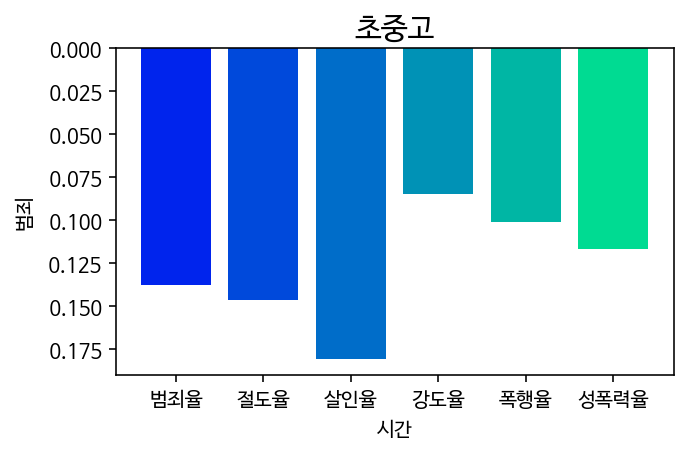

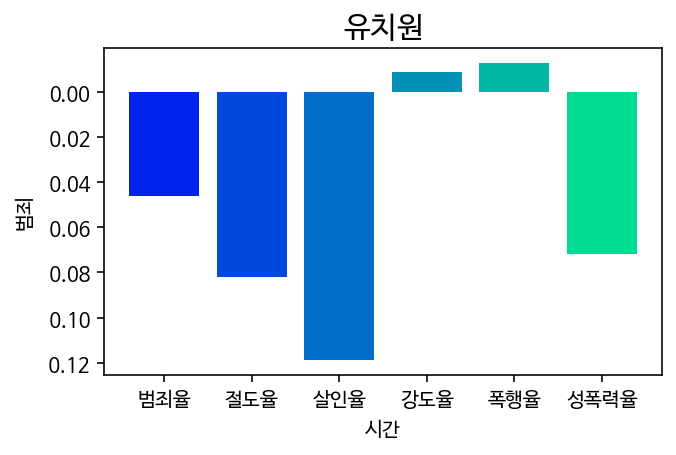

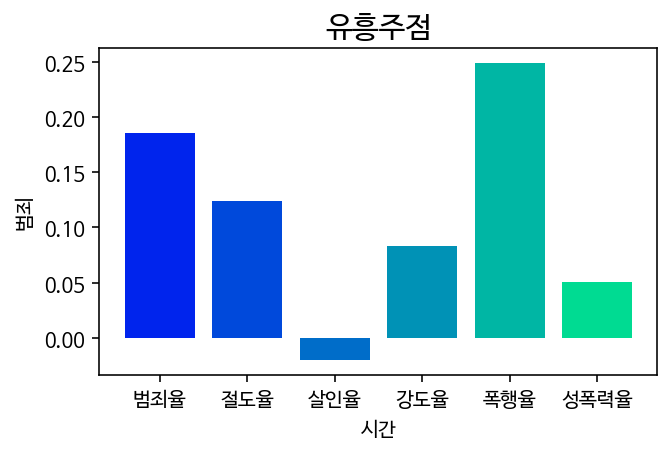

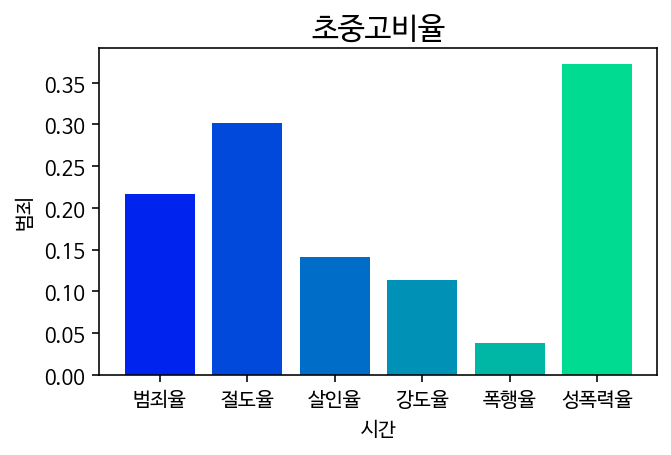

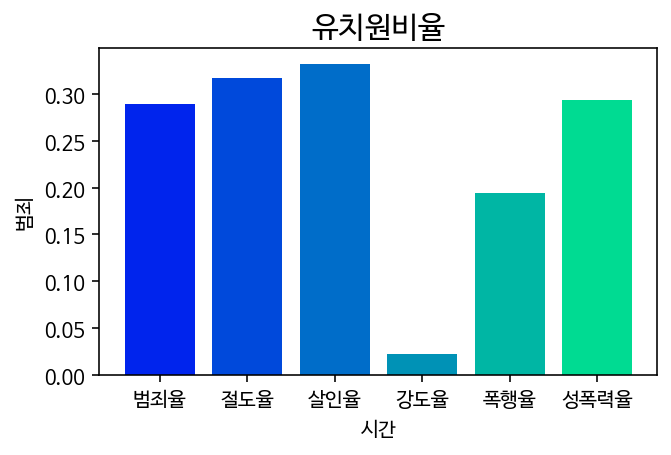

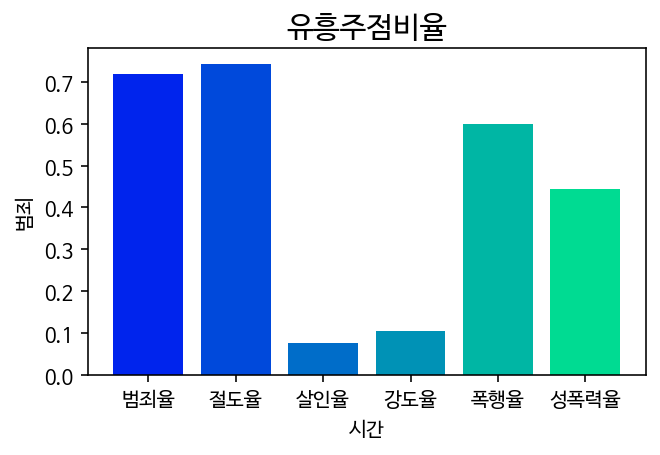

In [ ]:
c=['범죄율', '절도율', '살인율', '강도율', '폭행율', '성폭력율']
for i in ['초중고', '유치원', '유흥주점', '초중고비율', '유치원비율', '유흥주점비율']:
  now=[]
  for j in c:
    now.append(nd[j].corr(nd[i]))
  plt.figure(figsize=(5, 3))
  plt.title(i,fontsize=15)
  plt.xlabel('시간')
  plt.ylabel('범죄')
  colors = sns.color_palette('winter',len(now))
  plt.bar(c,now,color=colors)
  plt.show()

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/전국 범죄건수.csv',encoding='cp949')
df2=pd.read_csv('/content/drive/MyDrive/대학교 수정.csv')
df3=pd.read_csv('/content/drive/MyDrive/R&E채승현.csv',encoding='cp949')
df1.columns=['행정구역', '절도', '살인', '강도', '폭행', '성폭력']

In [ ]:
df2=df2[df2['행정구역'].isin(df1['행정구역'])]
df1=df1[df1['행정구역'].isin(df2['행정구역'])]
df3=df3[df3['행정구역'].isin(df1['행정구역'])]
df1=df1.reset_index()
df1=df1[['행정구역', '절도', '살인', '강도', '폭행', '성폭력']]
df1['총합']=df1['절도']+df1['살인']+df1['강도']+df1['폭행']+df1['성폭력']

In [ ]:
df3=df3.reset_index()
df3=df3[['전체인구(명)', '면적(m^2)']]
df3.columns=['전체인구', '면적']

In [ ]:
df2=df2.reset_index()
df2=df2[['행정구역', '개수']]
df2.columns=['행정구역', '대학교']

In [ ]:
nd=pd.concat([df1,df2,df3],axis=1)

In [ ]:
nd['범죄율']=nd['총합']/nd['전체인구']*100000

In [ ]:
for i in ['절도', '살인', '강도', '폭행', '성폭력']:
  nd[i+'율']=nd[i]/nd['전체인구']*100000

In [ ]:
nd['대학교비율']=nd['대학교']/nd['면적']*1000000

In [ ]:
c=['절도', '살인', '강도', '폭행', '성폭력', '총합', '범죄율', '절도율', '살인율', '강도율', '폭행율', '성폭력율']
for i in ['대학교','대학교비율']:
  for j in c:
    print(i,j,nd[j].corr(nd[i]))
  print()

대학교 절도 0.4519367863832423
대학교 살인 0.28536317986364707
대학교 강도 0.3155870095356462
대학교 폭행 0.38569185362924
대학교 성폭력 0.3337954128188696
대학교 총합 0.41665508044654526
대학교 범죄율 0.08765312365012193
대학교 절도율 0.17264925780870732
대학교 살인율 -0.042926694377386145
대학교 강도율 0.05434638839996326
대학교 폭행율 -0.01407408720282436
대학교 성폭력율 0.07060092883910411

대학교비율 절도 0.03500069618664739
대학교비율 살인 0.15666535448311164
대학교비율 강도 0.006746640080482586
대학교비율 폭행 -0.1035550743548114
대학교비율 성폭력 0.05923401457299597
대학교비율 총합 -0.03785566881437173
대학교비율 범죄율 0.19441236057546027
대학교비율 절도율 0.3230732886571028
대학교비율 살인율 0.22016503147163022
대학교비율 강도율 0.1466713363168184
대학교비율 폭행율 -0.013098488706210448
대학교비율 성폭력율 0.31900220126208434



In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/전국 범죄건수.csv',encoding='cp949')
df2=pd.read_csv('/content/drive/MyDrive/학원.csv')
df3=pd.read_csv('/content/drive/MyDrive/R&E채승현.csv',encoding='cp949')

In [ ]:
df1.columns=['행정구역', '절도', '살인', '강도', '폭행', '성폭력']

In [ ]:
df2=df2[df2['행정구역'].isin(df1['행정구역'])]
df1=df1[df1['행정구역'].isin(df2['행정구역'])]
df3=df3[df3['행정구역'].isin(df1['행정구역'])]
df1=df1.reset_index()
df1=df1[['행정구역', '절도', '살인', '강도', '폭행', '성폭력']]
df1['총합']=df1['절도']+df1['살인']+df1['강도']+df1['폭행']+df1['성폭력']

In [ ]:
df3=df3.reset_index()
df3=df3[['전체인구(명)', '면적(m^2)']]
df3.columns=['전체인구', '면적']

In [ ]:
df2=df2.reset_index()
df2=df2['학원']
df2

0       632
1       207
2        97
3       149
4       852
       ... 
143     571
144    1693
145     252
146    2062
147     459
Name: 학원, Length: 148, dtype: int64

In [ ]:
nd=pd.concat([df1,df2,df3],axis=1)

In [ ]:
nd['범죄율']=nd['총합']/nd['전체인구']*100000

In [ ]:
nd['학원비율(면적)']=nd['학원']/nd['면적']*1000000
nd['학원비율(인구)']=nd['학원']/nd['전체인구']*1000000

In [ ]:
for i in ['절도', '살인', '강도', '폭행', '성폭력']:
  nd[i+'율']=nd[i]/nd['전체인구']*100000

In [ ]:
c=['절도', '살인', '강도', '폭행', '성폭력', '총합', '범죄율', '절도율', '살인율', '강도율', '폭행율', '성폭력율']
for i in ['학원', '학원비율(면적)', '학원비율(인구)']:
  for j in c:
    print(i,j,nd[j].corr(nd[i]))
  print()

학원 절도 0.8098952354003671
학원 살인 0.5245732219980519
학원 강도 0.599943790974516
학원 폭행 0.8296892684880333
학원 성폭력 0.8008185788406303
학원 총합 0.8413241033258834
학원 범죄율 -0.12619445248191713
학원 절도율 -0.0966473074611622
학원 살인율 -0.258454940238621
학원 강도율 -0.04672996986521898
학원 폭행율 -0.16963502770794844
학원 성폭력율 0.047791045796291565

학원비율(면적) 절도 0.41787242275157244
학원비율(면적) 살인 0.23835273304633156
학원비율(면적) 강도 0.3072237050416129
학원비율(면적) 폭행 0.2341761678016288
학원비율(면적) 성폭력 0.48168983654961084
학원비율(면적) 총합 0.335081615424481
학원비율(면적) 범죄율 0.08542313528907206
학원비율(면적) 절도율 0.19220364046043237
학원비율(면적) 살인율 -0.11869974770368032
학원비율(면적) 강도율 0.07818957206757868
학원비율(면적) 폭행율 -0.10971073569028154
학원비율(면적) 성폭력율 0.3252762863224622

학원비율(인구) 절도 0.4331779456314457
학원비율(인구) 살인 0.1618637510738932
학원비율(인구) 강도 0.3170076479943161
학원비율(인구) 폭행 0.38992117564465545
학원비율(인구) 성폭력 0.4651741132019532
학원비율(인구) 총합 0.42391735634432826
학원비율(인구) 범죄율 -0.017593069838086808
학원비율(인구) 절도율 0.04729972626321688
학원비율(인구) 살인율 -0.3372010404186367
학원비

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/전국 범죄건수.csv',encoding='cp949')
df3=pd.read_csv('/content/drive/MyDrive/R&E채승현.csv',encoding='cp949')
df2=pd.read_csv('/content/drive/MyDrive/전국 CCTV (1).csv')

In [ ]:
df2.columns

Index(['행정구역', 'CCTV개수'], dtype='object')

In [ ]:
df3=df3[['행정구역', '전체인구(명)', '면적(m^2)']]
df3.columns=['행정구역', '전체인구', '면적']

In [ ]:
df1.columns=['행정구역', '절도', '살인', '강도', '폭행', '성폭력']

In [ ]:
df1['총합']=df1['절도']+df1['살인']+df1['강도']+df1['폭행']+df1['성폭력']

In [ ]:
df2=df2[df2['CCTV개수']!=0]

In [ ]:
df2=df2[df2['행정구역'].isin(df1['행정구역'])]
df1=df1[df1['행정구역'].isin(df2['행정구역'])]
df3=df3[df3['행정구역'].isin(df2['행정구역'])]

In [ ]:
df3=df3.reset_index()
df3=df3[['전체인구', '면적']]

In [ ]:
df2=df2.reset_index()
df2=df2[['행정구역', 'CCTV개수']]

In [ ]:
df1=df1.reset_index()
df1=df1[['총합', '절도', '살인', '강도', '폭행', '성폭력']]

In [ ]:
nd=pd.concat([df2,df1,df3],axis=1)

In [ ]:
nd['범죄율']=nd['총합']/nd['전체인구']*100000

In [ ]:
for i in ['절도', '살인', '강도', '폭행', '성폭력']:
  nd[i+'율']=nd[i]/nd['전체인구']*100000

In [ ]:
nd['CCTV개수비율(면적)']=nd['CCTV개수']/nd['면적']*1000000
nd['CCTV개수비율(인구)']=nd['CCTV개수']/nd['전체인구']*100000

In [ ]:
c=['절도', '살인', '강도', '폭행', '성폭력', '총합', '범죄율', '절도율', '살인율', '강도율', '폭행율', '성폭력율']
for i in ['CCTV개수','CCTV개수비율(면적)','CCTV개수비율(인구)']:
  for j in c:
    print(i,j,nd[j].corr(nd[i]))
  print()

CCTV개수 절도 0.6040408747537432
CCTV개수 살인 0.4807927557299191
CCTV개수 강도 0.40248151050344483
CCTV개수 폭행 0.6570313482647994
CCTV개수 성폭력 0.6081344109567803
CCTV개수 총합 0.6490479763172599
CCTV개수 범죄율 -0.08070168552608771
CCTV개수 절도율 -0.09803822981219922
CCTV개수 살인율 -0.09787414721979208
CCTV개수 강도율 -0.0820138570065829
CCTV개수 폭행율 -0.06207510409834711
CCTV개수 성폭력율 0.01845890980607586

CCTV개수비율(면적) 절도 0.1768465674503874
CCTV개수비율(면적) 살인 0.1358871913916076
CCTV개수비율(면적) 강도 0.057097728208063254
CCTV개수비율(면적) 폭행 0.040518230412146104
CCTV개수비율(면적) 성폭력 0.2326368710869844
CCTV개수비율(면적) 총합 0.11155874137350553
CCTV개수비율(면적) 범죄율 0.1744829962951644
CCTV개수비율(면적) 절도율 0.23803309531696942
CCTV개수비율(면적) 살인율 0.03652761784788858
CCTV개수비율(면적) 강도율 0.0023599987307427756
CCTV개수비율(면적) 폭행율 0.03543584794369787
CCTV개수비율(면적) 성폭력율 0.3224401712656585

CCTV개수비율(인구) 절도 -0.2291211913571439
CCTV개수비율(인구) 살인 -0.14551659171188486
CCTV개수비율(인구) 강도 -0.2133132561211632
CCTV개수비율(인구) 폭행 -0.1884348666226033
CCTV개수비율(인구) 성폭력 -0.18055797619596192
CCTV개수비율(

In [ ]:
nd['CCTV개수'].corr(nd['전체인구'])

0.6730975495060871

In [ ]:
print(nd['CCTV개수비율(인구)'].corr(nd['전체인구']/nd['면적']*1000000))
print(nd['CCTV개수비율(면적)'].corr(nd['전체인구']/nd['면적']*1000000))

-0.1272008903216217
0.7453447775556172
